In [25]:
import pandas as pd
import streamlit as st
import os
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [6]:
data_path = os.path.join('..', 'streamlits', 'coches.db')
conn = sqlite3.connect(data_path)
df = pd.read_sql_query("SELECT * FROM coches", conn)


In [11]:
df.head()

,manufacturer_code,manufacturer_car_id,car_id,car_vin,car_license_plate,car_local_model_id,car_url_id,car_body_type,car_mileage,car_price,...,dealer_zip_code,dealer_province,dealer_raw_id,dealer_email,dealer_email_domain,dealer_website,dealer_geo_lat,dealer_geo_lon,source,source_url
0,None,56b6a812-76bc-48e5-9f0c-45696f7cc699,None,NMTK53BX10R032683,0207LLC,89EA54BC-88B3-4DD4-BDCF-49958320698D,None,Todocaminos,83280,24500.0,...,28222.0,None,None,info@kobe.es,None,None,40.457488,-3.873439,Toyota Oficial Ocasión,https://www.toyota.es/
1,None,a09fc13b-19c0-492d-a09e-856a0413d573,None,SB1Z93BE00E153069,1344LLB,4C996AC7-604F-412E-A9B2-0569C09BF1E9,None,Turismos,81727,20900.0,...,29004.0,None,None,vo@cumaca.toyota.es,None,None,36.683820,-4.467146,Toyota Oficial Ocasión,https://www.toyota.es/
2,None,c09a7a18-61cf-4c1b-81ca-26e97074305b,None,VNKKBAC370A057151,5447LLL,9525A02B-DC60-4E2C-A8BD-CD74D2E4DCE3,None,Turismos,76291,18900.0,...,28222.0,None,None,info@kobe.es,None,None,40.457488,-3.873439,Toyota Oficial Ocasión,https://www.toyota.es/
3,None,a091d33e-323d-47f7-8699-01657104470b,None,SB1Z93BE30E150800,2551LKS,4C996AC7-604F-412E-A9B2-0569C09BF1E9,None,Turismos,161877,15900.0,...,29004.0,None,None,vo@cumaca.toyota.es,None,None,36.683820,-4.467146,Toyota Oficial Ocasión,https://www.toyota.es/
4,None,84f6392e-96d0-46fa-a398-c8feaefb4274,None,SB1K93BE00E134748,3126LLG,99979940-8BE2-4307-BE39-F2486F65BA1F,None,Turismos,43473,21900.0,...,29004.0,None,None,vo@cumaca.toyota.es,None,None,36.683820,-4.467146,Toyota Oficial Ocasión,https://www.toyota.es/


In [10]:

# fill car_registration_year from car_registration_date
df['car_registration_year'] = pd.to_datetime(
    df['car_registration_date']
).dt.year





In [20]:
df['car_transmission'].value_counts()\
                            .reset_index(drop=False)

,car_transmission,count
0,Automático,1309
1,Manual,370


In [28]:
df.columns.tolist()

['manufacturer_code',
 'manufacturer_car_id',
 'car_id',
 'car_vin',
 'car_license_plate',
 'car_local_model_id',
 'car_url_id',
 'car_body_type',
 'car_mileage',
 'car_price',
 'car_original_price',
 'car_catalogue_price',
 'car_martket_price',
 'car_price_excl_vat',
 'car_diff_prices',
 'car_transmission',
 'car_fuel',
 'car_gears',
 'car_gearbox',
 'car_power',
 'car_power_kw',
 'car_power_cv',
 'car_model',
 'car_model_name',
 'car_model_year',
 'car_model_description',
 'car_brand',
 'car_type',
 'car_package',
 'car_description',
 'car_engine',
 'car_exterior_color',
 'car_interior_color',
 'car_interior_style',
 'car_acceleration',
 'car_max_speed',
 'car_pollution_badge',
 'car_doors_num',
 'car_seats',
 'car_height',
 'car_length',
 'car_width',
 'car_registration_year',
 'car_age_months',
 'car_registration_date',
 'car_approved',
 'car_vat_reclaimable',
 'car_rental_type',
 'car_sale_status',
 'car_financing_tae',
 'car_url',
 'car_views',
 'car_emissions_class',
 'car_remai

In [31]:
df.nunique()[df.nunique()<5]

manufacturer_code               0
car_id                          0
car_url_id                      0
car_body_type                   3
car_original_price              0
car_diff_prices                 0
car_transmission                2
car_gears                       0
car_gearbox                     3
car_power                       0
car_model_name                  0
car_model_description           0
car_description                 0
car_engine                      0
car_pollution_badge             4
car_age_months                  0
car_approved                    0
car_vat_reclaimable             0
car_sale_status                 3
car_financing_tae               0
car_views                       0
car_emissions_class             2
car_remaining_warranty_years    0
car_date_offer                  0
dealer_fax                      0
dealer_country_code             0
dealer_region                   0
dealer_street                   0
dealer_province                 3
dealer_raw_id 

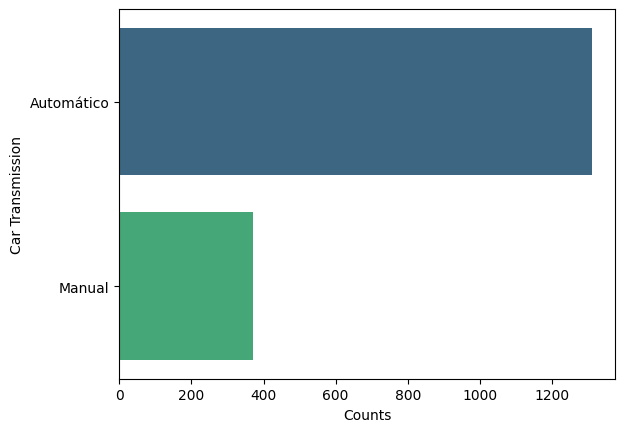

In [41]:
sns.barplot(df['car_transmission'].value_counts()\
                        .reset_index(drop=False)\
                        .rename(columns={'car_transmission':'Car Transmission'})\
                        .rename(columns={'count':'Counts'}),
                        x="Counts", 
                        y="Car Transmission", 
                        palette="viridis",
                        hue="Car Transmission", 
                        legend=False)

plt.show()